In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('sampled_test_datasets/sampled_data_aldi.csv')

# Considering sampling
train_df = data.sample(frac=0.05, random_state=42)

# Get the indices of the sampled data
sampled_indices = train_df.index

# Display the size of the original and sampled dataframes
print(f"Original Data Size: {len(data)}")
print(f"Sampled Data Size: {len(train_df)}")

Original Data Size: 600903
Sampled Data Size: 30045


In [3]:
train_df.head()

,date,category,Revenue,day_of_week_num,week_of_month,sin_day,cos_day,sin_week,cos_week,Last_Seen_Days,Revenue_lag1,Revenue_lag2,Revenue_lag3,sin_day_lag1,cos_day_lag1,sin_week_lag1,cos_week_lag1,weekly_rolling_avg,weekly_rolling_std
119416,2024-04-13,7,8.94,5,2,-0.9750,-0.2225,0.0,-1.0,0.0,10.43,10.43,7.45,-0.9750,-0.2225,0.0,-1.0,9.58,1.454
423813,2024-02-11,3,38.44,6,2,-0.7817,0.6235,0.0,-1.0,0.0,32.94,9.95,13.93,-0.7817,0.6235,0.0,-1.0,15.51,7.830
91292,2024-03-17,4,10.15,6,3,-0.7817,0.6235,-1.0,-0.0,0.0,10.15,7.25,8.70,-0.7817,0.6235,-1.0,-0.0,9.12,1.379
176734,2024-03-15,3,11.10,4,3,-0.4338,-0.9010,-1.0,-0.0,0.0,12.95,12.95,11.10,-0.4338,-0.9010,-1.0,-0.0,11.89,1.456
386625,2024-04-04,2,7.95,3,1,0.4338,-0.9010,1.0,0.0,0.0,11.13,11.13,9.54,0.4338,-0.9010,1.0,0.0,10.22,1.251


In [4]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

train_df['date'] = pd.to_datetime(train_df['date'])
train_df.set_index('date', inplace=True)

# Ensure the data is sorted by date
train_df.sort_index(inplace=True)

Performing stepwise search to minimize bic
 ARIMA(0,0,0)(0,0,0)[0]             : BIC=262813.974, Time=0.27 sec
 ARIMA(1,0,0)(0,0,0)[0]             : BIC=254235.508, Time=0.31 sec
 ARIMA(0,0,1)(0,0,0)[0]             : BIC=257735.796, Time=1.04 sec
 ARIMA(2,0,0)(0,0,0)[0]             : BIC=250774.771, Time=0.55 sec
 ARIMA(3,0,0)(0,0,0)[0]             : BIC=248895.784, Time=0.69 sec
 ARIMA(4,0,0)(0,0,0)[0]             : BIC=247741.093, Time=0.83 sec
 ARIMA(5,0,0)(0,0,0)[0]             : BIC=246951.192, Time=1.49 sec
 ARIMA(6,0,0)(0,0,0)[0]             : BIC=246356.988, Time=2.03 sec
 ARIMA(7,0,0)(0,0,0)[0]             : BIC=245826.623, Time=2.44 sec
 ARIMA(7,0,1)(0,0,0)[0]             : BIC=inf, Time=27.58 sec
 ARIMA(6,0,1)(0,0,0)[0]             : BIC=inf, Time=23.74 sec
 ARIMA(7,0,0)(0,0,0)[0] intercept   : BIC=242251.264, Time=5.98 sec
 ARIMA(6,0,0)(0,0,0)[0] intercept   : BIC=242242.058, Time=4.78 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : BIC=242232.568, Time=4.17 sec
 ARIMA(4,0,0)(0,0

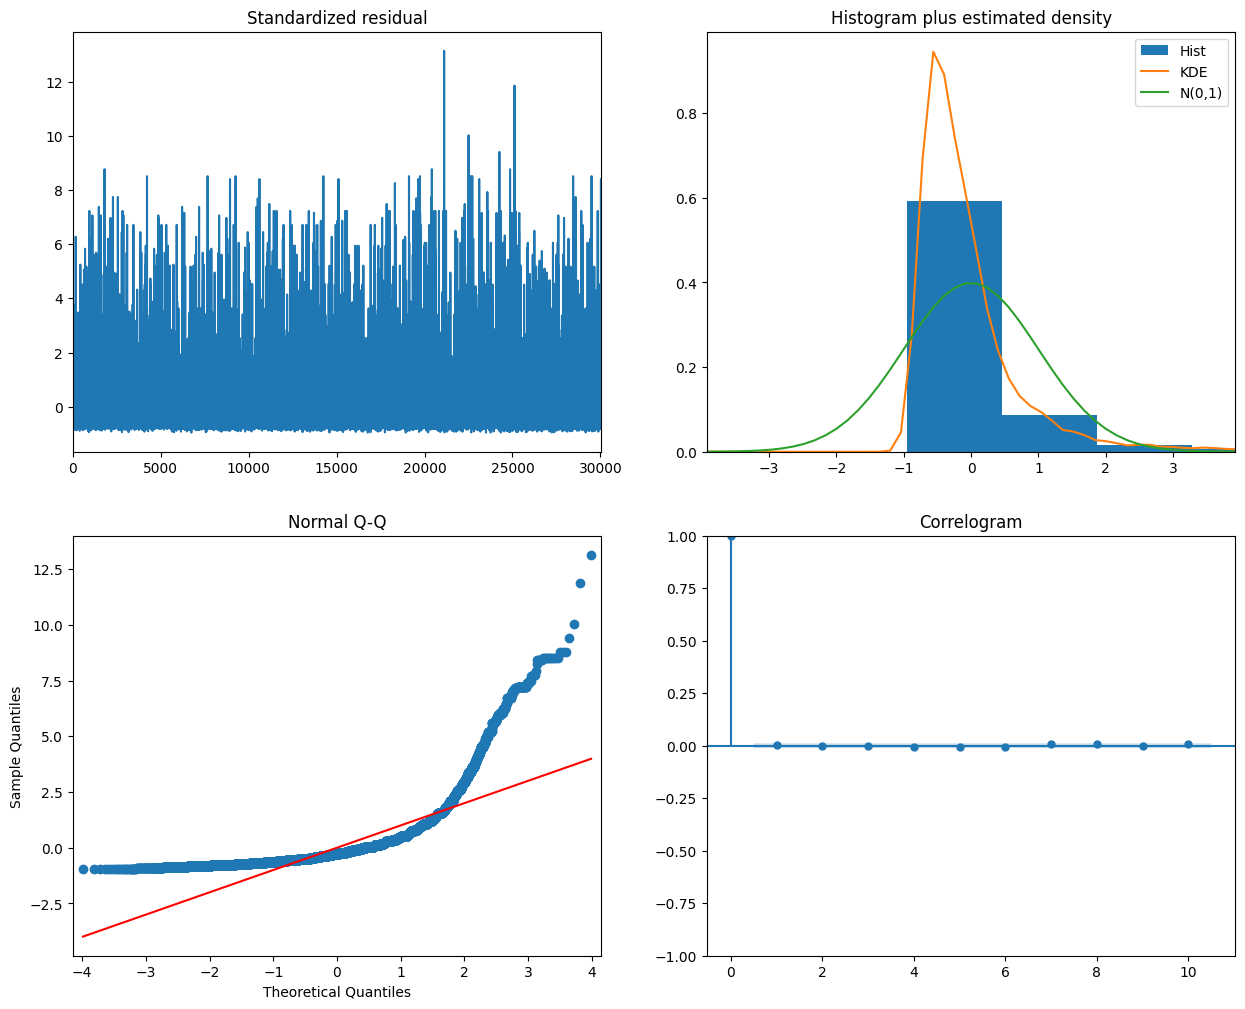

In [5]:
from pmdarima import auto_arima

# Using auto_arima to find the best ARIMA model
model = auto_arima(train_df['Revenue'], start_p=0, start_q=0,
                   max_p=7, max_q=7,
                   seasonal=False,
                   d=None, trace=True,
                   error_action='ignore',  
                   suppress_warnings=True, 
                   stepwise=True,
                   information_criterion='bic') 

# Print the summary of the best model
print(model.summary())

# Plot model diagnostics
model.plot_diagnostics(figsize=(15, 12))
plt.show()

In [42]:
# Define the model, here using placeholder parameters (p=1, d=1, q=1)
model = ARIMA(train_df['Revenue'], order=(60, 0, 65))
model_fit = model.fit()

# Print out the summary of the model fit
print(model_fit.summary())

/home/ubuntu/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ubuntu/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ubuntu/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ubuntu/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be s

                               SARIMAX Results                                
Dep. Variable:                Revenue   No. Observations:                   92
Model:               ARIMA(60, 0, 65)   Log Likelihood                -322.907
Date:                Thu, 02 May 2024   AIC                            899.813
Time:                        20:43:13   BIC                           1220.080
Sample:                             0   HQIC                          1029.076
                                 - 92                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.9789     26.143      0.535      0.593     -37.261      65.219
ar.L1          0.2878     50.977      0.006      0.995     -99.625     100.201
ar.L2         -0.2116     61.491     -0.003      0.9

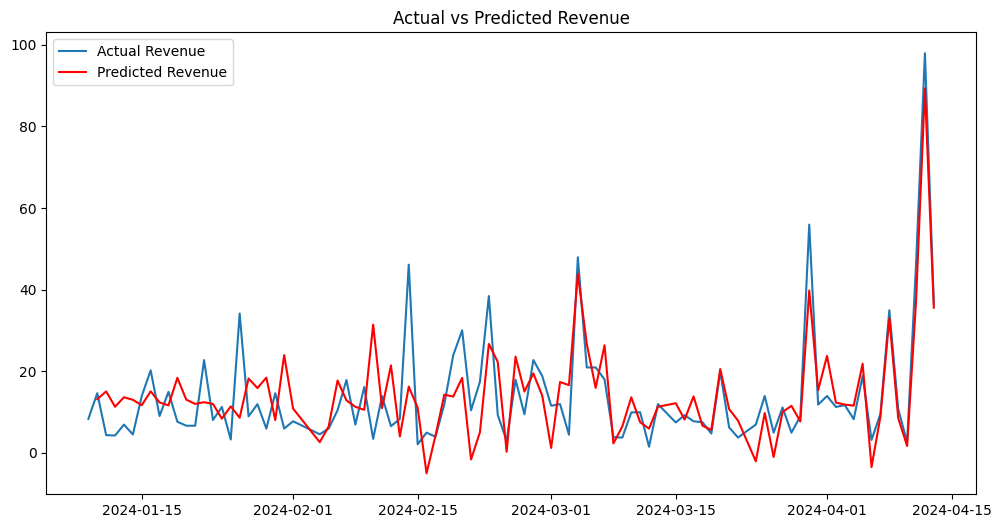

In [43]:
# In-sample predictions
train_df['predictions'] = model_fit.predict(start=train_df.index[1], end=train_df.index[-1], typ='levels')

# Plotting actual vs predicted values for visualization
plt.figure(figsize=(12, 6))
plt.plot(train_df['Revenue'], label='Actual Revenue')
plt.plot(train_df['predictions'], label='Predicted Revenue', color='red')
plt.title('Actual vs Predicted Revenue')
plt.legend()
plt.show()


In [44]:
train_df['predictions'].fillna(train_df['Revenue'].iloc[0], inplace=True)

In [45]:
# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(train_df['Revenue'], train_df['predictions']))
mae = mean_absolute_error(train_df['Revenue'], train_df['predictions'])
r_squared = r2_score(train_df['Revenue'], train_df['predictions'])

print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r_squared)


Root Mean Squared Error (RMSE): 8.443252674235996
Mean Absolute Error (MAE): 6.304595264019705
R-squared (R²): 0.6366755512485923
